In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [2]:
mnist = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 8s 1us/step


In [59]:
(X_train_full, y_train_full) , (X_test, y_test)  = mnist

In [60]:
X_train_full, X_test= X_train_full.reshape(X_train_full.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

In [61]:
X_train_full = StandardScaler().fit_transform(X_train_full)
X_test = StandardScaler().fit_transform(X_test)

In [81]:
X_train, y_train, X_valid, y_valid = X_train_full[:50000], y_train_full[:50000], X_train_full[50000:], y_train_full[50000:]

In [124]:
def build_classifier(input_shape=[784], 
                     n_neurons_hidden=30,
                     n_hidden=2, 
                     activation_hidden='relu',
                     n_neurons_output=10,
                     activation_output='softmax', 
                     lr=1e-3,
                    loss='sparse_categorical_crossentropy',
                    metrics='accuracy'):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for k in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons_hidden, activation=activation_hidden))
    model.add(keras.layers.Dense(n_neurons_output, activation=activation_output))
    optimizer = keras.optimizers.SGD(learning_rate=lr)
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model

In [125]:
model = build_classifier()

# Base estimation - Early Stopping

In [127]:
early_callback = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
         epochs=100, callbacks=[early_callback])

Epoch 1/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8923 - val_loss: 0.3366 - val_accuracy: 0.9094
Epoch 2/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3446 - accuracy: 0.8992 - val_loss: 0.3148 - val_accuracy: 0.9143
Epoch 3/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3211 - accuracy: 0.9064 - val_loss: 0.2979 - val_accuracy: 0.9184
Epoch 4/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3023 - accuracy: 0.9115 - val_loss: 0.2845 - val_accuracy: 0.9221
Epoch 5/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2868 - accuracy: 0.9165 - val_loss: 0.2732 - val_accuracy: 0.9255
Epoch 6/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2737 - accuracy: 0.9194 - val_loss: 0.2642 - val_accuracy: 0.9276
Epoch 7/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2624 - accuracy: 0.9226 - val_loss: 0.2565 - val_ac

1563/1563 [==============================] - 4s 3ms/step - loss: 0.1171 - accuracy: 0.9651 - val_loss: 0.1671 - val_accuracy: 0.9552
Epoch 58/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1161 - accuracy: 0.9653 - val_loss: 0.1667 - val_accuracy: 0.9551
Epoch 59/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1151 - accuracy: 0.9657 - val_loss: 0.1663 - val_accuracy: 0.9552
Epoch 60/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1140 - accuracy: 0.9662 - val_loss: 0.1658 - val_accuracy: 0.9556
Epoch 61/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1130 - accuracy: 0.9663 - val_loss: 0.1655 - val_accuracy: 0.9557
Epoch 62/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1119 - accuracy: 0.9668 - val_loss: 0.1652 - val_accuracy: 0.9562
Epoch 63/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1111 - accuracy: 0.9669 - val_loss: 0.1647 - val_accuracy

<AxesSubplot:>

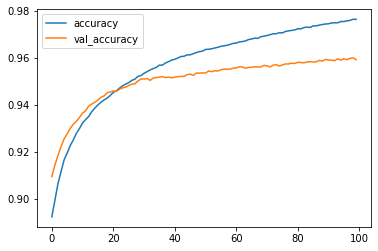

In [128]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

In [129]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1670 - accuracy: 0.9571


[0.1669912338256836, 0.957099974155426]

In [138]:
model.predict(X_test[:10]).argmax(axis=1), y_test[:10]

1/1 [==============================] - 0s 11ms/step


(array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))